# 9. Банки — Анализ оттока клиентов

 **Задачи проекта**
   
- Проанализируйте клиентов регионального банка и выделите сегменты клиентов,
которые склонны уходить из банка.

- Проведите исследовательский анализ данных, определите все значимые
признаки отточности (интервалы значений характеристик, которые связаны с
повышенным оттоком, сравните портреты типичных клиентов, которые
склонны и не склонныуходить из банка и т.д)

- Сформулируйте и проверьте статистические гипотезы.
  
- Проверьте гипотезу различия дохода между теми клиентами, которые
ушли и теми, которые остались.

- Сформулируйте и проверьте статистическую гипотезу относительно
представленных данных, которая поможет внести ясность в исследование

- Объединяя признаки отточности, сформируйте сегменты, отберите из них
лучшие и дайте по ним рекомендации

In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import numpy as np
import pandas as pd
import scipy.stats as sps
from scipy import stats as st
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew, mode
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv('/datasets/bank_scrooge.csv')
bank.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


• userid — идентификатор пользователя

• score — баллы кредитного скоринга, Банки — Анализ оттока клиентов 2

• City — город,

• Gender — пол,

• Age — возраст,

• Objects — количество объектов в собственности /

equity — количество баллов собственности ( какая-то оценка, которую банк дал имущественному положению клиента)

• Balance — баланс на счёте

• Products — количество продуктов, которыми пользуется клиент

• CreditCard — есть ли кредитная карта

• Loyalty / last_activity — активный клиент

• estimated_salary — заработная плата клиента

• Churn — 1 - ушёл или остался - 0

equinty Это количество баллов собственности, то есть какая-то оценка, которую банк дал имущественному положению клиента

credit_card, last_activity. churn Churn 0 - не ушёл, 1 - ушёл. last_activity 0 - не активный, last_activity 1 - активный

balance, salary - могут быть просто условные единицы.

last_activity - "активный клиент" клиент может быть формально клиентом, то есть не разорвать с ним договор, но фактически операций уже может не совершать

balance - Все средства клиента: депозиты+текущие счета. Кредитный лимит не учитывается.

                            Подготовка данных 

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [4]:
bank.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [5]:
print(bank['balance'].isna().sum())
print('В столбце balance {} % пропусков'. format(bank['balance'].isna().sum()/len(bank)*100))

2295
В столбце balance 22.95 % пропусков


пропуски в столбцах возраста  и средств клиентов
возраст скорее связан со Случайными пропусками и их очень мало

а вот Средства клиентов в большом колличестве и, учитывая, что речь идет о банке, назвать случайными пропусками сложно 

In [6]:
# Посчитаем долю пропусков в зависимости отточности клиента.
bank[bank['balance'].isna()]['churn'].value_counts(normalize=True)*100

0    99.433551
1     0.566449
Name: churn, dtype: float64

Доля пропусков в разрезе оттока составила всего 0, 52%

In [7]:
# Посмотрим уровень корреляции balance с другими параметрами
corr = bank.corr()
pd.DataFrame(data=corr['balance']).style.background_gradient('coolwarm')

,balance
USERID,0.006133
score,0.235812
age,0.069745
equity,0.164126
balance,1.000000
products,0.075684
credit_card,-0.059253
last_activity,0.025004
EST_SALARY,0.339622
churn,0.085577


In [8]:
bank['balance_null'] = bank['balance'].notnull().astype('int')

In [9]:
# приведем названия колонок к нижнему регистру
bank = bank.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'})

In [10]:
# Посмотрим уровень корреляции balance_null с другими параметрами
corr = bank.corr()
pd.DataFrame(data=corr['balance_null']).style.background_gradient('coolwarm')

,balance_null
user_id,-0.004125
score,-0.138871
age,0.028659
equity,0.709951
balance,nan
products,0.487512
credit_card,-0.158334
last_activity,-0.028362
est_salary,-0.307154
churn,0.249421


Максимальная корреляция наблюдается со столбцом equity,
по шкале Чеддока она является тесной, остальные связи слабые или их нет совсем. 

Пропуски зависят от признака equity, эти пропуски относятся к MNAR (Missing Not At Random / Отсутствует не случайно) и зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям

оставляем их без изменений

In [97]:
# удалю строки с пропусками в возрасте 
bank['age'] = bank['age'].dropna()

In [98]:
bank['products']

0       2
1       3
2       1
3       2
4       1
       ..
9995    1
9996    1
9997    2
9998    3
9999    4
Name: products, Length: 10000, dtype: int64

In [99]:
#рассмотрим 
display(bank[bank['products'] ==0])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0


клиент ушел из банка и у него нет действующих продуктов. Удалим данную строку.

In [100]:
bank = bank.drop(index= 8957)

In [101]:
# сделаю целыми числа в столбцах score 
bank['score'] = bank['score'].astype('int')

In [102]:
sorted_bank = bank.sort_values(by='products')
sorted_bank

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
7799,212446,742,Ярославль,М,29.0,3,199366.88,1,1,1,84160.90,0,1
3247,149214,905,Рыбинск,Ж,54.0,5,653920.73,1,1,0,179725.12,0,1
3248,212801,874,Рыбинск,М,69.0,4,1172235.05,1,1,0,46239.97,0,1
3250,139931,904,Рыбинск,Ж,42.0,0,NaN,1,1,1,125594.69,0,0
7431,205074,895,Рыбинск,М,24.0,0,NaN,1,1,0,100171.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,155765,863,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1,1
3884,138642,823,Ярославль,Ж,37.0,1,118329.87,5,1,1,105095.05,0,1
1479,209431,882,Рыбинск,М,42.0,4,1142013.06,5,1,0,101051.78,1,1
7545,226524,893,Ярославль,М,29.0,5,867727.78,5,1,1,144983.66,1,1


In [103]:
bank['user_id'].nunique()

9926

In [104]:
bank['user_id'].duplicated().sum()

73

In [105]:
bank[bank['user_id'].duplicated(keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
1893,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,1
7694,116540,887,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0,0
7542,117943,880,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0,0
4866,117943,855,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1,1
5896,120258,905,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1,1
8205,227795,840,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1,1
8497,227795,839,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0,1
6457,228075,839,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0,1


В таблице есть несколько клиентов с одинаковым id, это скорее всего является ошибкой или дублированием данных. В этом случае нельзя однозначно идентифицировать конкретного клиента, то есть невозможно сказать, кто из них является реальным клиентом, поэтому оставляем как есть

In [106]:
bank.sample(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
1568,138582,883,Ростов,М,34.0,0,NaN,1,0,1,151361.49,0,0
6403,160401,924,Рыбинск,Ж,56.0,0,NaN,1,1,0,90697.19,0,0
3509,182260,727,Ярославль,Ж,27.0,3,224543.28,2,0,1,13525.33,0,1
9386,133030,870,Ярославль,Ж,70.0,5,1411554.48,2,0,1,52694.78,0,1
751,205152,838,Ярославль,М,41.0,4,936633.64,3,0,0,159826.87,0,1


Исследуем пропуски

In [107]:
bank.groupby('products')['balance'].apply(lambda x :x.isna().sum())

products
1    1950
2     315
3      29
4       0
5       0
Name: balance, dtype: int64

больше всего пропусков у клиентов с 1 продуктом

In [108]:
bank.groupby('churn')['balance'].apply(lambda x :x.isna().sum())

churn
0    2282
1      12
Name: balance, dtype: int64

больше всего пропусков у оставшихся клиентов

In [109]:
bank.groupby('city')['balance'].apply(lambda x :x.isna().sum())

city
Ростов        235
Рыбинск       592
Ярославль    1467
Name: balance, dtype: int64

In [110]:
bank['city'].value_counts()

Ярославль    5888
Рыбинск      2694
Ростов       1417
Name: city, dtype: int64

и в городе Ярославль

In [111]:
bank.groupby('gender')['balance'].apply(lambda x :x.isna().sum())

gender
Ж    1012
М    1282
Name: balance, dtype: int64

In [112]:
bank['gender'].value_counts()

М    5005
Ж    4994
Name: gender, dtype: int64

In [113]:
bank.groupby('last_activity')['balance'].apply(lambda x :x.isna().sum())

last_activity
0    1033
1    1261
Name: balance, dtype: int64

In [114]:
bank.groupby('credit_card')['balance'].apply(lambda x :x.isna().sum())

credit_card
0     422
1    1872
Name: balance, dtype: int64

и у владельцев кредитных карт

In [115]:
print(bank['balance'].isna().sum())
print('В столбце balance {} % пропусков'. format(bank['balance'].isna().sum()/len(bank)*100))

2294
В столбце balance 22.94229422942294 % пропусков


можно предположить, что на момент выгрузки у какого-то количества клиентов просто не было средств на счету

In [116]:
a.T

,0,1
balance_null,0,1
est_salary,226310.208654,124501.872366
age,42.093023,42.924366
products,1,2
equity,0,4
gender,М,М
city,Ярославль,Ярославль


In [117]:
ab.T

balance_null,0,1
est_salary,NaN,-0.449862
age,NaN,0.019750
products,NaN,0.790725
equity,NaN,65.595567


In [118]:
bank['balance'].min() 

0.0

In [119]:
bank['balance'].max() 

119113552.01

In [120]:
# группируем данные по данной колонке и считатет количество пропусков и их долю

def bank_null(bank,col):
    data = bank.groupby(col)[col].count().to_frame().rename(columns={col:'nan_num'}).reset_index()
    data['nan_share'] = (100*data['nan_num']/data['nan_num'].sum()).map('{0:.2f}%'.format)
    data = data.sort_values(by='nan_num',ascending=False)
    return data

In [121]:
# словарь для подписей таблиц
col_dict = {
            'city':'города',
            'gender':'пола',
            'equity':'оценки собственности',
            'products':'количествава используемых продуктов',
            'credit_card':'наличия кредитной карты',
            'last_activity':'активности',
            'churn':'отточности',
}

In [122]:
#датафрейм с пропусками в колонке 'balance'
balance_null = bank[bank['balance'].isna()]

In [123]:
for col in ['city','gender', 'equity','products','credit_card','last_activity','churn']:
    
    print(f'Пропуски в колонке balance в разрезе {col_dict[col]}')
    display(bank_null(balance_null,col))
    print('-'*65)

Пропуски в колонке balance в разрезе города


,city,nan_num,nan_share
2,Ярославль,1467,63.95%
1,Рыбинск,592,25.81%
0,Ростов,235,10.24%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе пола


,gender,nan_num,nan_share
1,М,1282,55.88%
0,Ж,1012,44.12%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе оценки собственности


,equity,nan_num,nan_share
0,0,2180,95.03%
1,1,114,4.97%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе количествава используемых продуктов


,products,nan_num,nan_share
0,1,1950,85.00%
1,2,315,13.73%
2,3,29,1.26%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе наличия кредитной карты


,credit_card,nan_num,nan_share
1,1,1872,81.60%
0,0,422,18.40%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе активности


,last_activity,nan_num,nan_share
1,1,1261,54.97%
0,0,1033,45.03%


-----------------------------------------------------------------
Пропуски в колонке balance в разрезе отточности


,churn,nan_num,nan_share
0,0,2282,99.48%
1,1,12,0.52%


-----------------------------------------------------------------


In [124]:
# Создадим датафрейм с выделенными раннее признаками и посчитаем кол-во пропусков и их долю в связке
prof_null = balance_null.groupby(['churn','credit_card','equity','products'])['user_id'].count().reset_index()
prof_null['nan_share'] = (100*prof_null['user_id']/prof_null['user_id'].sum()).map('{0:.2f}%'.format)
prof_null = prof_null.sort_values(by='user_id',ascending=False).head()
prof_null

,churn,credit_card,equity,products,user_id,nan_share
5,0,1,0,1,1507,65.69%
0,0,0,0,1,337,14.69%
6,0,1,0,2,245,10.68%
8,0,1,1,1,84,3.66%
1,0,0,0,2,55,2.40%


больше всего пропусков (1507 или 65.69% от общего числа пропусков) у неотточных клиентов, имеющих кредитную карту, 1 продукт и не имеющие приблизительную оценку их собственности.
MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

    Изучение данных 

- Анализ распределения признаков

- Анализ потретов клиентов 

- Корреляционный анализ

In [125]:
bank.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1
5,202305,856,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,1
6,177259,807,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,1
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0,1
8,211686,923,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0,1
9,133130,906,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,0


Анализ распределения признаков

In [126]:
bank.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
count,9999.000000,9999.000000,9973.000000,9999.000000,7.705000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000
mean,171817.110611,848.688069,42.730773,2.627563,8.277943e+05,1.870287,0.680468,0.523552,1.478792e+05,0.181918,0.770577
std,33709.070798,65.441981,12.175166,1.980931,1.980614e+06,0.792466,0.466319,0.499470,1.393901e+05,0.385796,0.420483
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000
25%,142809.500000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525212e+04,0.000000,1.000000
50%,172740.000000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000,1.000000
75%,201262.500000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745011e+05,0.000000,1.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000


Категориальные данные номинального вида: City . Gender.equity. Products. CreditCard. Loyalty / last_activity. Churn

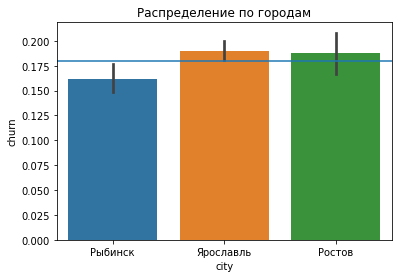

In [127]:
barplot_2 = sns.barplot(x="city",y="churn",data=bank)
barplot_2.axhline(0.18)
plt.title('Распределение по городам')
plt.show()

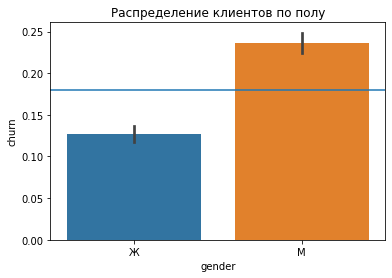

In [128]:
barplot_3 = sns.barplot(x="gender",y="churn",data=bank)
barplot_3.axhline(0.18)
plt.title('Распределение клиентов по полу')
plt.show()

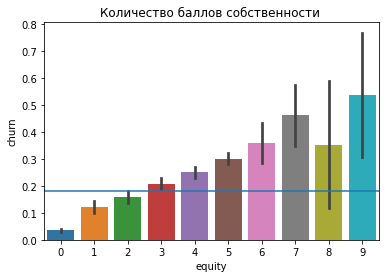

count    9999.000000
mean        2.627563
std         1.980931
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64

In [129]:
barplot_4 = sns.barplot(x="equity",y="churn",data=bank)
barplot_4.axhline(0.18)
plt.title('Количество баллов собственности ')
plt.show()
bank['equity'].describe()

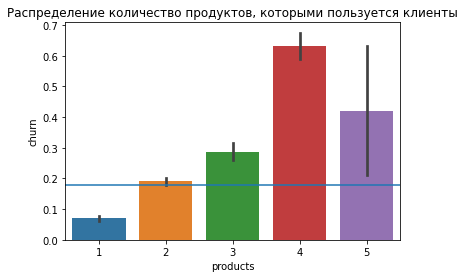

In [130]:
barplot_5 = sns.barplot(x="products",y="churn",data=bank)
barplot_5.axhline(0.18)
plt.title('Распределение количество продуктов, которыми пользуется клиенты')
plt.show()

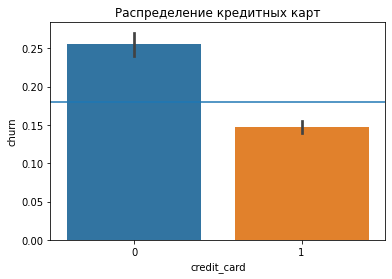

In [131]:
barplot_6 = sns.barplot(x="credit_card",y="churn",data=bank)
barplot_6.axhline(0.18)
plt.title('Распределение кредитных карт')
plt.show()

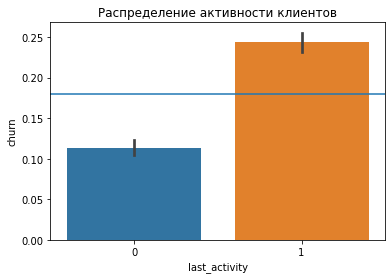

In [132]:
barplot_7 = sns.barplot(x="last_activity",y="churn",data=bank)
barplot_7.axhline(0.18)
plt.title('Распределение активности клиентов')
plt.show()

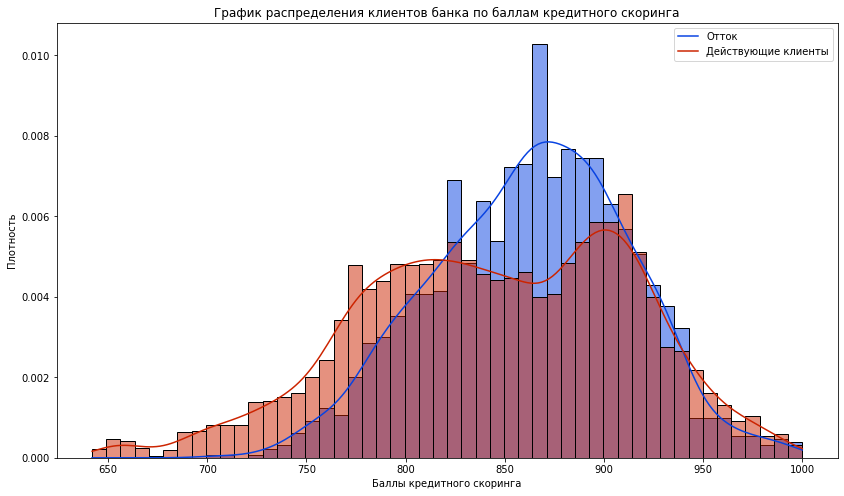

In [133]:
#распределение клиентов банка по баллам кредитного скоринга
plt.figure(figsize=(14,8))
colors = ['#cc2400', '#0843e2']

plt.title('График распределения клиентов банка по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Плотность')
sns.histplot(bank, x='score', hue='churn', stat='density', kde=True, common_norm=False, bins=50, palette=colors)
plt.legend(labels=['Отток', 'Действующие клиенты'])
plt.show()

самыми отточными клиентами являются с кредитным скорингом 830-920

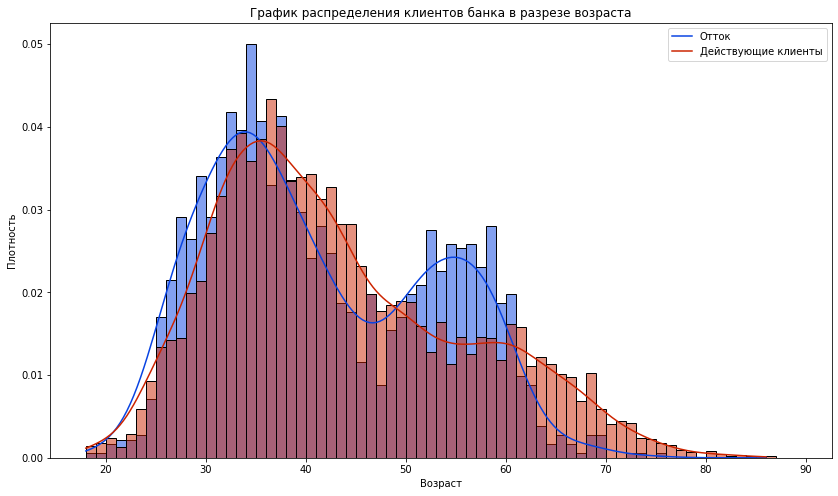

In [134]:
plt.figure(figsize=(14,8))

colors = ['#cc2400', '#0843e2']
plt.title('График распределения клиентов банка в разрезе возраста')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
sns.histplot(bank, x='age', hue='churn', stat='density', common_norm=False,  kde=True,  bins=range(18,90), palette=colors)
plt.legend(labels=['Отток', 'Действующие клиенты'])
plt.show()

подвержены к оттоку являются клиенты в возрасте 25-35 и 50-60

In [135]:
bank['balance'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]),2

(count    7.705000e+03
 mean     8.277943e+05
 std      1.980614e+06
 min      0.000000e+00
 5%       1.001043e+05
 25%      2.955542e+05
 50%      5.242722e+05
 75%      9.807058e+05
 95%      2.116705e+06
 99%      4.827443e+06
 max      1.191136e+08
 Name: balance, dtype: float64,
 2)

In [136]:
bank_b = bank[bank['balance']<2.116705e+06]

In [137]:
bank_b.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1
5,202305,856,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0,1


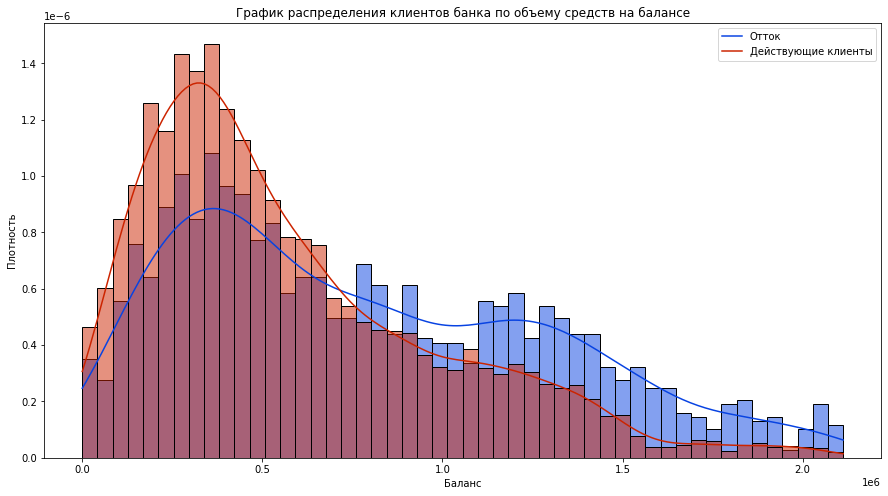

In [138]:
plt.figure(figsize=(15, 8))

colors = ['#cc2400', '#0843e2']
plt.title('График распределения клиентов банка по объему средств на балансе')
plt.xlabel('Баланс')
plt.ylabel('Плотность')
sns.histplot(bank_b, x='balance', hue='churn', stat='density',  kde=True, common_norm=False, bins=50, palette=colors)
plt.legend(labels=['Отток', 'Действующие клиенты'])

plt.show()

Наибольший отток наблюдается у клиентов, имеющих на балансе средств больше 700тыс руб

In [139]:
bank['est_salary'].describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99])

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
5%       3.216954e+04
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
95%      3.168856e+05
99%      8.879388e+05
max      1.395064e+06
Name: est_salary, dtype: float64

        Выводы:
        

- большой отток в Ярославле 

- отток в мужской категории пользователей

- наибольший отток приходиться на возраст  32,34,35,37 или если в промежутках 29-40

- отток на промежутке 850-900 баллов кредитного скоринга

- отток на 3-4-5 баллам собственности

- отток у клиентов с 2 продуктами

- наличие кредитной карты почти не влияет на отток клиентов, но у отточных больше 

- отточные клиенты более активные

- отток на уровне 100т -средних зарплатах

- отток на 4-5 количества баллов собственности 

In [140]:
bank_e = bank[bank['est_salary']<3.168853e+05]

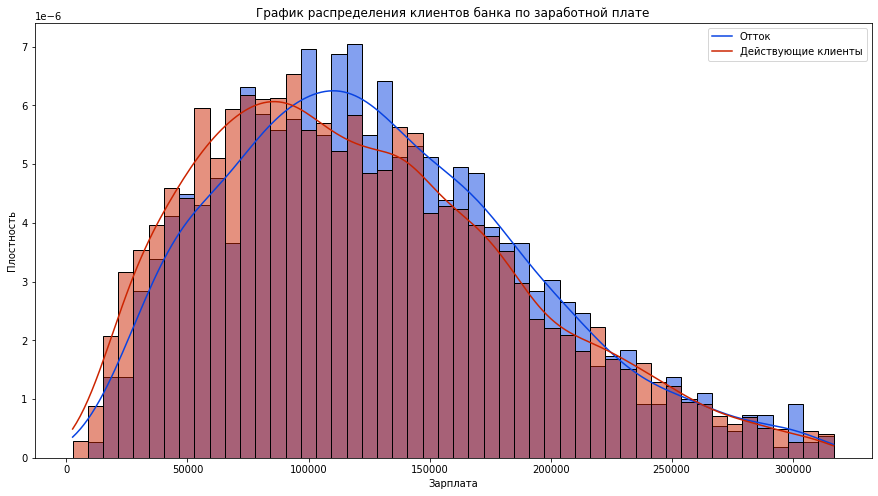

In [141]:
plt.figure(figsize=(15, 8))

colors = ['#cc2400', '#0843e2']
plt.title('График распределения клиентов банка по заработной плате')
plt.xlabel('Зарплата')
plt.ylabel('Плостность')
sns.histplot(bank_e, x='est_salary', hue='churn', stat='density',  kde=True, common_norm=False, bins=50, palette=colors)
plt.legend(labels=['Отток', 'Действующие клиенты'])

plt.show()


наиболее подвержены оттоку клиенты с высокой зп 100-200 тыс руб

 непрерывных переменных sns.histplot с параметрами hue и настройками stat="density", common_norm=False
 
 непрерывные данные:  score. Age. Balance. estimated_salary

     Промежуточные выводы :
     

- по параметру equity-чем больще балл, тем выше отточность

- наибольший отток имеют клиенты, которые пользуются 4 продуктами банка

- больше клиентов уходят, у которых нет кредитных карт

- более подвержены оттоку активные клиенты

- в Ярославле наблюдается более высокий отток клиентов

- мужчины больше подвержены оттоку

                        Анализ портретов клиентов 

In [142]:
bank.head(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1


будут собраны в виде таблицы, и по каждому признаку между сегментами будет посчитана относительная разница в виде таблицы 

In [143]:
EDA = bank.groupby('churn', as_index=False).agg({'est_salary':['mean','median'],
                                               'balance':['mean','median'],
                                               'age':'mean',
                                               'products':'median',
                                               'equity':'median',
                                               'gender': 'max',
                                               'city': 'max',
                                               'credit_card':'mean',
                                               'last_activity':'mean',
                                                 'score':['mean','median'],
                                                })

In [144]:
EDA.T

0              1
churn                             0              1
est_salary    mean    147783.200108  148310.728202
              median     118257.715      125395.22
balance       mean    733982.585648  1133993.27145
              median     475382.445      782410.47
age           mean        43.020846      41.429593
products      median              2              2
equity        median              3              4
gender        max                 М              М
city          max         Ярославль      Ярославль
credit_card   mean         0.709169       0.551402
last_activity mean         0.483741       0.702584
score         mean       845.428362     863.346894
              median            848            866

In [145]:
EDA_1= bank.groupby("churn")["est_salary", 'balance', 'age'].mean().pct_change()
EDA_1

,est_salary,balance,age
churn,,,
0,NaN,NaN,NaN
1,0.00357,0.544987,-0.036988


    Портрет клиента наиболее подверженного к оттоку:
    

- клиенты банка в Ярославле

- в основном мужчины

- средний возраст 41 год (против 43)

- с балансом в среднем больше 1,1 млн

- средней зп 148 тыс руб

- имеющие 4 балла собственности

- не имеющие кредитной карты

- наиболее активные

                                     Категоризация

In [146]:
# добавлю столбец Ж=0, М=1 
bank['gender_1'] = bank['gender']
bank = pd.get_dummies(bank, columns=['gender_1'], drop_first= True)

In [147]:
# разделю столбец с возрастом на категории
def age_1(age):
    
    if 23 > age >= 18:
        return '18-23'
    if 35 >= age >= 24:
        return '24-35'
    if 49 >= age >= 36:
        return '36-49'
    if 61 >= age >= 50:
        return '50-61'
    if 62 <= age:
        return '61+'   

In [148]:
# новый столбец
bank['age_1'] = bank['age'].apply (age_1)
display (bank.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null,gender_1_М,age_1
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,24-35
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,36-49
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,24-35
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,50-61
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,1,24-35


In [149]:
# копия столбца :
bank['age_2'] = bank['age_1']
display (bank.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null,gender_1_М,age_1,age_2
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,24-35,24-35
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,36-49,36-49
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,24-35,24-35
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,50-61,50-61
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,1,24-35,24-35


In [150]:
bank = pd.get_dummies(bank, columns = ['age_2'])
bank = bank.rename (columns = ({
    'age_2_18-23':'18-23', 'age_2_24-35':'24-35','age_2_36-49':'36-49', 
    'age_2_50-61':'50-61', 'age_2_61+':'61+'}))
display (bank.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_null,gender_1_М,age_1,18-23,24-35,36-49,50-61,61+
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,24-35,0,1,0,0,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,36-49,0,0,1,0,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,0,24-35,0,1,0,0,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,50-61,0,0,0,1,0
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,1,1,24-35,0,1,0,0,0


In [151]:
bank['city_1'] = bank['city']
bank = pd.get_dummies(bank, columns = ['city_1'])
bank = bank.rename (columns = ({
    'city_1_Ростов':'Ростов', 'city_1_Рыбинск':'Рыбинск','city_1_Ярославль':'Ярославль'}))
bank.sample(5)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,gender_1_М,age_1,18-23,24-35,36-49,50-61,61+,Ростов,Рыбинск,Ярославль
5180,208619,956,Ярославль,М,40.0,0,NaN,1,1,1,...,1,36-49,0,0,1,0,0,0,0,1
4326,226666,914,Ростов,Ж,32.0,4,597918.39,2,1,1,...,0,24-35,0,1,0,0,0,1,0,0
8440,143209,800,Рыбинск,Ж,30.0,0,3396.37,1,1,0,...,0,24-35,0,1,0,0,0,0,1,0
6629,135450,899,Ярославль,Ж,44.0,0,NaN,1,1,0,...,0,36-49,0,0,1,0,0,0,0,1
1025,192918,898,Ростов,М,48.0,0,NaN,1,1,1,...,1,36-49,0,0,1,0,0,1,0,0


In [152]:
bank['age_1'].value_counts()

36-49    3882
24-35    3144
50-61    1915
61+       885
18-23      94
Name: age_1, dtype: int64

Корреляционный анализ

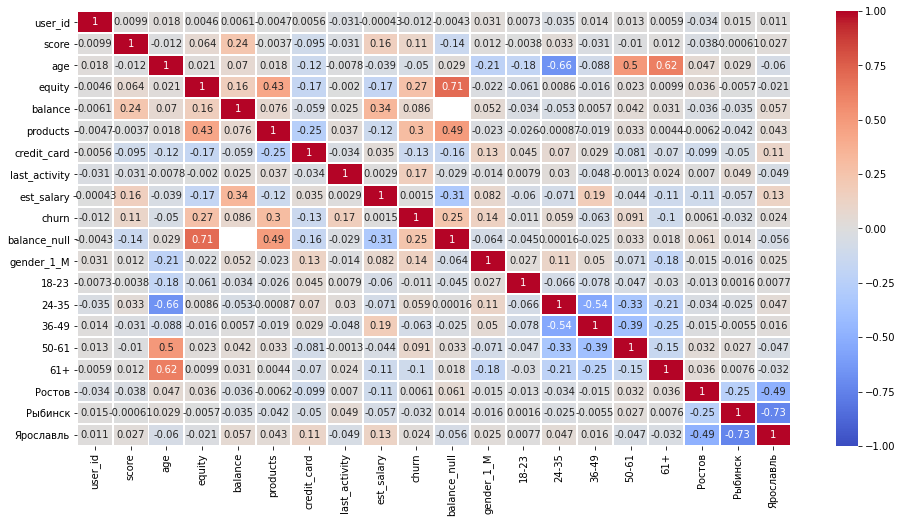

In [153]:
plt.figure(figsize=(16,8))
heatmap_1 = sns.heatmap (bank.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=1)

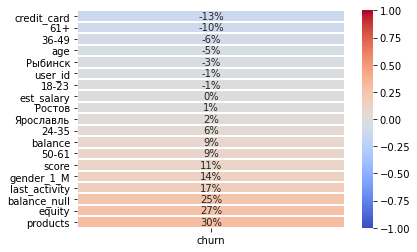

In [154]:
heatmap_2 = sns.heatmap(
    bank.corr()[['churn']].drop('churn').sort_values('churn'),annot=True, vmin=-1, vmax=1, center= 0,
    cmap='coolwarm', linewidths=1, fmt = '.0%')

                               Проверка статистических гипотез

In [155]:
bank.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,gender_1_М,age_1,18-23,24-35,36-49,50-61,61+,Ростов,Рыбинск,Ярославль
0,183012,850,Рыбинск,Ж,25.0,1,59214.82,2,0,1,...,0,24-35,0,1,0,0,0,0,1,0
1,146556,861,Рыбинск,Ж,37.0,5,850594.33,3,1,0,...,0,36-49,0,0,1,0,0,0,1,0
2,120722,892,Рыбинск,Ж,30.0,0,NaN,1,1,1,...,0,24-35,0,1,0,0,0,0,1,0
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,0,50-61,0,0,0,1,0,0,0,1
4,157978,730,Ярославль,М,34.0,5,174.00,1,1,0,...,1,24-35,0,1,0,0,0,0,0,1
5,202305,856,Рыбинск,М,56.0,4,863687.24,3,1,0,...,1,50-61,0,0,0,1,0,0,1,0
6,177259,807,Ярославль,Ж,39.0,3,405042.44,3,0,1,...,0,36-49,0,0,1,0,0,0,0,1
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,...,0,36-49,0,0,1,0,0,0,0,1
8,211686,923,Ярославль,М,54.0,5,1206337.87,2,1,0,...,1,50-61,0,0,0,1,0,0,0,1
9,133130,906,Ярославль,Ж,67.0,0,NaN,1,0,1,...,0,61+,0,0,0,0,1,0,0,1


Мы будем использовать t-тест для проверки статистических гипотез. T-тест, также известный как тест Стьюдента, является методом, позволяющим определить, есть ли статистически значимые различия между средними значениями двух независимых выборок. Он использует распределение Стьюдента и помогает определить, насколько значимы различия в средних значениях групп.
T-тест может применяться в следующих случаях:

Сравнение средних значений двух групп: с помощью t-теста можно проверить, есть ли статистически значимые различия между средними значениями двух независимых групп.

Нормальное распределение данных: возможность применения t-теста предполагает, что данные имеют нормальное распределение. Однако, при достаточно большом размере выборки (обычно более 30 наблюдений) и отсутствии явных нарушений других предпосылок, t-тест может быть устойчивым к нарушению нормальности.

Однородность (равенство) дисперсий: в случае, если группы имеют различные дисперсии, необходимо указать параметр "equal_var=False".

Мы будем использовать уровень значимости 5%, так как в данном исследовании стремимся к высокой степени надежности результатов.

Сформулируем гипотезу №1:

Н0: средние доходы между теми клиентами, которые ушли и теми, которые остались - равны;

Н1: средние доходы между теми клиентами, которые ушли и теми, которые остались - не равны.

Для проверки гипотезы проведем t-test:

In [156]:
alpha = 0.05
est_salary_churn_1 = bank[bank['churn']==1]['est_salary']
est_salary_churn_0 = bank[bank['churn']==0]['est_salary']

if np.var(est_salary_churn_1)>=np.var(est_salary_churn_0):
    print('Дисперсия доходов ушедших клиентов выше дисперсии оставшихся в', np.var(est_salary_churn_1)/np.var(est_salary_churn_0))
else:
    print('Дисперсия доходов оставшихся клиентов выше дисперсии ушедших в', np.var(est_salary_churn_0)/np.var(est_salary_churn_1))

levene = st.levene(est_salary_churn_1,est_salary_churn_0,center='median')
if levene[1]<alpha:
    print('По тесту Ливена диспресии различаются')

Дисперсия доходов оставшихся клиентов выше дисперсии ушедших в 1.3503659374283317
По тесту Ливена диспресии различаются


In [157]:
results = st.ttest_ind (
    bank[bank['churn']==0]['est_salary'],
    bank[bank['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8724727072323815
Не получилось отвергнуть нулевую гипотезу


По результатам теста нулевую гипотезу о том, что средние доходы между теми клиентами, которые ушли и теми, которые остались равны опровергнуть не удалось.

                                  Сформулируем гипотезу №2:

Н0: среднее количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались равны;

Н1: среднее количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались не равны.

In [158]:
alpha = 0.05
products_churn_1 = bank[bank['churn']==1]['products']
products_churn_0 = bank[bank['churn']==0]['products']

if np.var(products_churn_1)>=np.var(products_churn_0):
    print('Дисперсия используемых продуктов ушедших клиентов выше дисперсии оставшихся в', np.var(products_churn_1)/np.var(products_churn_0))
else:
    print('Дисперсия используемых продуктов оставшихся клиентов выше дисперсии ушедших в', np.var(products_churn_0)/np.var(products_churn_1))

levene = st.levene(products_churn_1,products_churn_0,center='median')
if levene[1]<alpha:
    print('По тесту Ливена диспресии различаются')

Дисперсия используемых продуктов ушедших клиентов выше дисперсии оставшихся в 1.6695480055608058
По тесту Ливена диспресии различаются


In [159]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind (
    bank[bank['churn']==0]['products'],
    bank[bank['churn']==1]['products'], equal_var = False)

alpha = 0.05

# вывод значения p-value на экран 
print (results.pvalue) 
# условный оператор с выводом строки с ответом

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

3.241238337429691e-139
Отвергаем нулевую гипотезу


Здесь мы также видим, что нулевую гипотезу о том, что среднее количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались равны опровергнуть не удалось.

                              Промежуточный вывод 

В результате анализа количественных непрерывных параметров score, age, balance и est_salary были сделаны следующие выводы:

- самыми отточными клиентами являются с кредитным скорингом 830-920;

- наиболее всего подвержены к оттоку являются клиенты в возрасте 0-45 и 50-60;

- наибольший отток наблюдается у клиентов, имеющих на балансе средств больше 700 тыс руб;

- наиболее подвержены оттоку клиенты с зп 100-200 тыс руб.



Выводы по дискретным / категориальным / бинарным параметрам клиентов:

- по параметру equity-чем больше балл, тем выше отточность;

- наибольший отток имеют клиенты, которые пользуются 4 продуктами банка;

- больше клиентов уходят, у которых нет кредитных карт;

- более подвержены оттоку активные клиенты;



в Ярославле наблюдается более высокий отток клиентов;

- мужчины больше подвержены оттоку.



Портрет клиента наиболее подверженного к оттоку:

- клиенты банка в Ярославле;

- в основном мужчины;

- средний возраст 41 год (против 43);

- с балансом в среднем больше 1,1 млн;

- средней зп 148 тыс руб;

- имеющие 4 балла собственности;

- не имеющие кредитной карты;

- наиболее активные.

Согласно шкале Чеддока заметной и высокой корелляции между параметрами не наблюдается.

Умеренная корреляция наблюдается между оценкой собственности и используемыми продуктами банка, зарплатой и балансом и между отточностью и используемыми продуктами.

                                            Выводы по гипотезам:

По результатам теста нулевую гипотезу о том, что средние доходы между теми клиентами, которые ушли и теми, которые остались равны опровергнуть не удалось.

Также нулевую гипотезу о том, что среднее количество используемых продуктов между теми клиентами, которые ушли и теми, которые остались равны опровергнуть не удалось.

                                           Сегментация  

Возьмём следующие параметры для выделения сегментов пользователей:

- клиенты банка в Ярославле

- мужчин

- клиентов с кредитным скорингом 830-920

- клиентов в возрасте 25-35 и 50-60

- клиентов, имеющих на балансе средств больше 700 тыс руб

- клиентов с зп 100-200 тыс руб

- клиентов, имеющих 4 балла собственности

- активных клиентов

- а также клиентов без кредитных карт

                                                  Сегмент №1

- Клиенты с кредитным скорингом 830-920 баллов

- Клиенты с зарплатой более 100 тыс.

- Клиенты, имеющих на балансе средств больше 700 тыс руб;

- Активные клиенты

In [160]:
segment_1 = bank[
    ( (bank["score"] >= 830) & (bank["score"] <= 920))
    & (bank["est_salary"] > 100000)
    & (bank["balance"] >700000)
    & (bank["last_activity"] == 1)
   
]

segment_1_total = len(segment_1)
segment_1_churn = segment_1[segment_1["churn"] == 1]["churn"].count()
segment_1_ch_share = segment_1["churn"].mean()


print("Количество выбранных клиентов в сегменте:", segment_1_total)
print("Количество ушедших клиентов:", segment_1_churn)
print("Процент оттока в сегменте: {:.2%}".format(segment_1_ch_share))


Количество выбранных клиентов в сегменте: 611
Количество ушедших клиентов: 414
Процент оттока в сегменте: 67.76%


                                             Сегмент №2

- Клиентов в возрасте 25-35

- Клиенты банка в Ярославле

- Клиентов без кредитных карт

In [161]:
segment_2 = bank[
    ( (bank["age"] >= 25) & (bank["age"] <= 35))
    & (bank["Ярославль"] ==1)
    & (bank["credit_card"] ==0)   
]

segment_2_total = len(segment_2)
segment_2_churn = segment_2[segment_2["churn"] == 1]["churn"].count()
segment_2_ch_share = segment_2["churn"].mean()


print("Количество выбранных клиентов в сегменте:", segment_2_total)
print("Количество ушедших клиентов:", segment_2_churn)
print("Процент оттока в сегменте: {:.2%}".format(segment_2_ch_share))


Количество выбранных клиентов в сегменте: 409
Количество ушедших клиентов: 166
Процент оттока в сегменте: 40.59%


                                       Сегмент №3

- мужчины

- клиенты с кредитными картами

- активные клиенты

In [162]:
segment_3 = bank[
    ( (bank['gender_1_М'] == 1 ))
    & (bank["last_activity"] ==1)
    & (bank["credit_card"] ==1) 
]

segment_3_total = len(segment_3)
segment_3_churn = segment_3[segment_3["churn"] == 1]["churn"].count()
segment_3_ch_share = segment_3["churn"].mean()


print("Количество выбранных клиентов в сегменте:", segment_3_total)
print("Количество ушедших клиентов:", segment_3_churn)
print("Процент оттока в сегменте: {:.2%}".format(segment_3_ch_share))


Количество выбранных клиентов в сегменте: 1866
Количество ушедших клиентов: 469
Процент оттока в сегменте: 25.13%


                                   Приоритизация сегментов

Самым отточным сегментом является 


- Сегмент №1 - 67%, 
- Сегмент №2 - 41% 
- Сегмент №3 - 25%.

                                                 Рекомендации

                                                  Сегмент №2

- клиенты в возрасте 25-35

- клиенты банка в Ярославле

- клиентов без кредитных карт

 Таким клиентам можно предложить
 
 

- Выгодные условия по ипотеке: программы с поддержкой государства, которые предоставляют льготные процентные ставки и условия для покупки жилья.

- Повышенный кешбек по картам банка: ознакомить клиентов с вариантами карт, которые предлагают повышенный кешбек на определенные категории товаров или услуг.

- Кредитные карты с льготными условиями для перевода зарплаты: можно предложить клиентам оформить кредитные карты и предложить им льготные условия для перевода своей зарплаты в банк, например, более высокий процент кешбека или бесплатные услуги.

- Повышенный кешбек на разные категории товаров: предложить клиентам карты с повышенным кешбеком на определенные категории товаров, такие как путешествия, рестораны или покупки в определенных магазинах. Это поможет им получить дополнительные бонусы и сэкономить деньги.



                                                  Сегмент №1

- Клиенты с кредитным скорингом 830-920 баллов

- Клиенты с зарплатой более 100 тыс.

- Клиенты, имеющих на балансе средств больше 700 тыс руб;

- Активные клиенты

 Для клиентов из данной категории можно рекомендовать:
 
 

- Выгодные кредитные карты: Учитывая хороший скоринг клиентов, банк может предложить им выгодные условия на кредитные карты, такие как низкие процентные ставки или отсутствие ежегодной платы за обслуживание.

- Дополнительные услуги по льготным тарифам: При предоставлении продуктов банка, можно предложить клиентам дополнительные услуги по льготным тарифам. Например, бесплатное страхование жизни на период первого года при оформлении ипотеки.

- Упрощенные проверки и одобрение кредитов: ускорить процесс проверки и одобрения кредитов для клиентов из этой категории, учитывая их хороший скоринг и доверие в банк.

- Повышенный кешбек на различные категории: предложить клиентам карты с повышенным кешбеком на различные категории покупок, особенно на туризм, развлечения и другие сферы, которые могут быть интересны этой категории клиентов.


                                                 Сегмент №3

- мужчины

- клиенты с кредитными картами

- активные клиенты

 Для клиентов из данной категории можно рекомендовать
 

- Повышенный кешбек на различные категории:ознакомить с вариантами повышенного кешбека по картам банка, особенно на туризм, развлечения и т.п.

- Выгодные продукты: провести информирование ушедших клиентов о появлении новых продуктов, более выгодных тарифов и процентных ставок

- Дополнительные услуги: использования новых продуктов (персональный менеджер)

- Выгодные условия: ознакомить с вариантами покупок в рассрочку с помощью банка

                                   Рекомендации для уменьшения отточности:

 Для молодых клиентов для уменьшения оттока можно предложить:

- программы с поддержкой государства, которые предоставляют льготные процентные ставки и условия для покупки жилья

- кредитные карты с льготными условиями для перевода зарплаты: можно предложить клиентам оформить кредитные карты и предложить им льготные условия для перевода своей зарплаты в банк, например, более высокий процент кешбека или бесплатные услуги

 Для клиентов с высокой заработной платой и большим балансом для уменьшения оттока можно
 
 

- организовать программу лояльности для постоянных клиентов (например, бонусы за пользование продуктами банка)

- Для клиентов с большим кредитным рейтингом и большим балансом на счету для уменьшения оттока мы можем

- предложить более привлекательные условия по кредиту и другим продукта банка, по сравнению с конкурентами

- улучшить качество обслуживания (например, сократить время ожидания в очереди или улучшить работу call-центра или предоставить персонального менеджера)